In [1]:
#version de Python
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [2]:
#version de pycaret
import pycaret
pycaret.__version__

'3.3.2'

In [33]:
#version de pycaret
import streamlit
streamlit.__version__

ModuleNotFoundError: No module named 'streamlit'

# Importation des données

In [3]:
#dossier par défaut
import os
os.chdir("C:/Users/Administrateur/Desktop/apprentissage/essai2")

#chargement des données
import pandas
donnees = pandas.read_excel("pima-subset-pycaret.xlsx")
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   diastolic  724 non-null    int64  
 1   bodymass   724 non-null    float64
 2   age        724 non-null    int64  
 3   plasma     724 non-null    int64  
 4   diabete    724 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 28.4+ KB


In [4]:
#distribution des classes
donnees.diabete.value_counts()

negative    475
positive    249
Name: diabete, dtype: int64

# Expérimentation - Développement du modèle

## Initialisation + choix de l'algo + paramètrage de la session

In [5]:
#création d'une session de travail (expérimentations)
#code en mode "objet"
from pycaret.classification import ClassificationExperiment

#instaciation et initialisation
session = ClassificationExperiment()
session.setup(donnees,target="diabete",train_size=0.7,data_split_stratify=True,normalize=True,fold=5,session_id=2024)

#verif.
print(session)

,Description,Value
0,Session id,2024
1,Target,diabete
2,Target type,Binary
3,Target mapping,"negative: 0, positive: 1"
4,Original data shape,"(724, 5)"
5,Transformed data shape,"(724, 5)"
6,Transformed train set shape,"(506, 5)"
7,Transformed test set shape,"(218, 5)"
8,Numeric features,4
9,Preprocess,True


In [6]:
#lister les modèles dispnibles pour la classification
#aka classification supervisée
algos = session.models()
print(algos)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr    

## Premier modèle avec les paramètres par défaut

In [19]:
#modélisation sur le train avec la régression logistique
modele_first = session.create_model("lr")
print(modele_first)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7451,0.8098,0.7451,0.7367,0.7358,0.4019,0.4089
1,0.7525,0.8416,0.7525,0.7542,0.7533,0.4571,0.4572
2,0.7723,0.8290,0.7723,0.7724,0.7565,0.4491,0.4726
3,0.7426,0.7909,0.7426,0.7343,0.7302,0.3907,0.4019
4,0.7426,0.8235,0.7426,0.7364,0.7383,0.4064,0.4081
Mean,0.7510,0.8190,0.7510,0.7468,0.7428,0.4211,0.4298
Std,0.0112,0.0173,0.0112,0.0146,0.0103,0.0268,0.0292


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2024, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [21]:
#évaluation sur l'échantillon test
res = session.predict_model(modele_first)

#affichage - on a le résumé + un data frame des observé vs. prédictions
print(res[['diabete','prediction_label','prediction_score']])

      diabete prediction_label  prediction_score
217  positive         positive            0.5355
0    positive         positive            0.6572
548  negative         negative            0.6950
472  negative         negative            0.7620
87   negative         positive            0.5499
..        ...              ...               ...
603  positive         positive            0.5437
52   positive         positive            0.8802
649  negative         negative            0.8883
437  negative         negative            0.8662
132  negative         negative            0.7158

[218 rows x 3 columns]


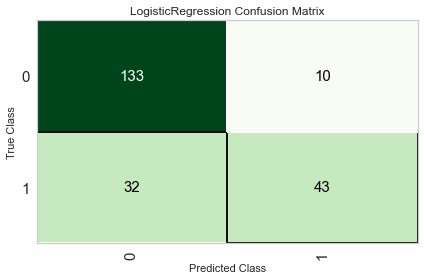

"session.plot_model(modele_first, plot='auc')\nsession.plot_model(modele_first, plot='pr')\nsession.plot_model(modele_first, plot='feature')\nsession.plot_model(modele_first, plot='error')\nsession.plot_model(modele_first, plot='calibration')\nsession.plot_model(modele_first, plot='manifold')\nsession.plot_model(modele_first, plot='class_report')"

In [22]:
session.plot_model(modele_first, plot='confusion_matrix')
'''session.plot_model(modele_first, plot='auc')
session.plot_model(modele_first, plot='pr')
session.plot_model(modele_first, plot='feature')
session.plot_model(modele_first, plot='error')
session.plot_model(modele_first, plot='calibration')
session.plot_model(modele_first, plot='manifold')
session.plot_model(modele_first, plot='class_report')'''


## Recherche du meilleur modèle

In [23]:
#optimiser les paramètres de l'algo
modele_best = session.tune_model(modele_first,optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7451,0.8098,0.7451,0.7367,0.7358,0.4019,0.4089
1,0.7525,0.8416,0.7525,0.7542,0.7533,0.4571,0.4572
2,0.7723,0.8290,0.7723,0.7724,0.7565,0.4491,0.4726
3,0.7426,0.7905,0.7426,0.7343,0.7302,0.3907,0.4019
4,0.7426,0.8231,0.7426,0.7364,0.7383,0.4064,0.4081
Mean,0.7510,0.8188,0.7510,0.7468,0.7428,0.4211,0.4298
Std,0.0112,0.0175,0.0112,0.0146,0.0103,0.0268,0.0292


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
#affichage du modèle
modele_best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2024, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#vérif. de nouveau en test
session.predict_model(modele_best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8073,0.8434,0.8073,0.8079,0.7977,0.5411,0.5575


,diastolic,bodymass,age,plasma,diabete,prediction_label,prediction_score
217,86,44.000000,22,142,positive,positive,0.5355
0,72,33.599998,50,148,positive,positive,0.6572
548,76,38.700001,42,100,negative,negative,0.6950
472,78,37.299999,40,96,negative,negative,0.7620
87,72,33.900002,40,144,negative,positive,0.5499
...,...,...,...,...,...,...,...
603,80,29.500000,50,147,positive,positive,0.5437
52,68,37.700001,41,187,positive,positive,0.8802
649,80,24.600000,34,107,negative,negative,0.8883
437,56,21.799999,21,124,negative,negative,0.8662


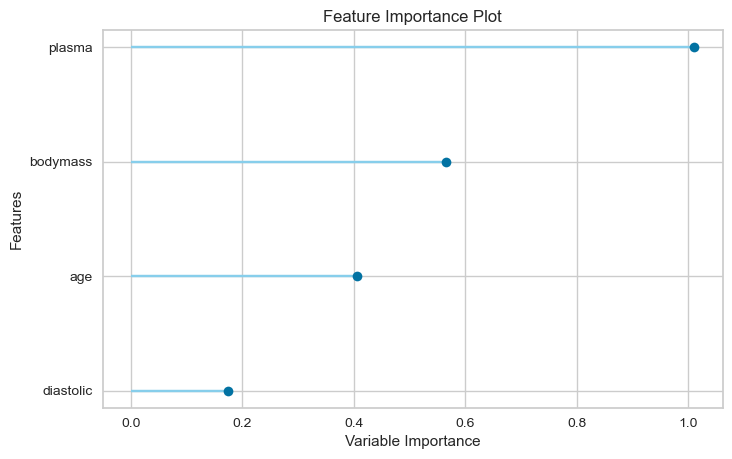

In [27]:
#affichage de l'importance des variables
session.plot_model(modele_best,plot="feature")

In [29]:
#coefficients
temp_df = pandas.DataFrame({'var':modele_best.feature_names_in_,'coef':modele_best.coef_[0]})
temp_df

,var,coef
0,diastolic,-0.173767
1,bodymass,0.564592
2,age,0.405622
3,plasma,1.010563


## Modèle définitif entraîné sur la totalité des données

In [30]:
#modele définitif
modele_final = session.finalize_model(modele_best)

#c'est un pipeline en réalité
#avec un preprocessing par défaut
modele_final

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['diastolic', 'bodymass', 'age',
                                             'plasma'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              mis...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=2024,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Déploiement

In [31]:
#création du fichier pikle pour le déploiement (c'est le pipelin qui a été sauvegardé)
session.save_model(modele_final,"modele_fotio")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['diastolic', 'bodymass', 'age',
                                              'plasma'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               mis...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,
       